In [1]:
import numpy as np
import pandas as pd

In [2]:
import zipfile
import os

# Extract both files from the zip
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # List all files in the zip
    print("Files in zip:")
    for file_info in zip_ref.filelist:
        print(f"- {file_info.filename}")

    # Extract both files
    zip_ref.extractall('extracted_files')

print("Files extracted successfully!")

Files in zip:
- Musical_Instruments_5.json
- Musical_instruments_reviews.csv
Files extracted successfully!


In [3]:
df = pd.read_csv('extracted_files/Musical_instruments_reviews.csv')
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


In [4]:
#check for missing values
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [5]:
#fill missing values with ""
df['reviewText'] = df['reviewText'].fillna("")

In [6]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [7]:
#Concatenate review text and Summary columns

df["reviews"] = df["reviewText"] + " " + df["summary"]
df.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)
df

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...
...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all. Five S..."
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


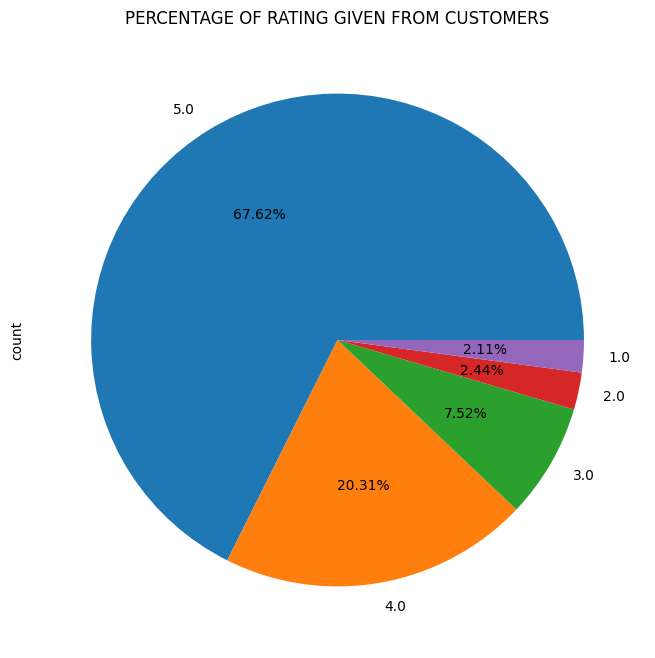

In [8]:
#percentage of rating given from customers
from collections import Counter
import matplotlib.pyplot as plt


df.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize = (8,8))
plt.title("PERCENTAGE OF RATING GIVEN FROM CUSTOMERS", loc = "center")
plt.show()

In [9]:
#Labeling product based on Ratings

def Labelling(Rows) :
    if(Rows["overall"] > 3.0) :
        Label = "Positive"
    elif(Rows["overall"] < 3.0) :
        Label = "Negative"
    else :
        Label = "Neutral"

    return Label

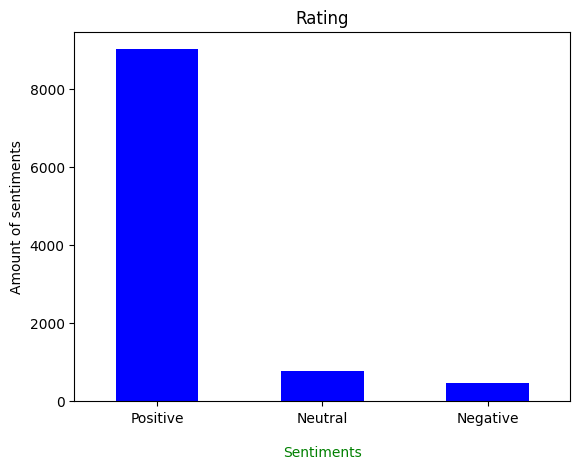

In [10]:
df["sentiment"] = df.apply(Labelling, axis = 1)
df["sentiment"].value_counts().plot(kind = 'bar', color = "blue")
plt.title("Rating")
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of sentiments")
plt.show()

In [11]:
#  Text cleaning
import re
import string

def Text_cleaning(Text):

    Text = Text.lower()                        # 1: lower case
    punc = str.maketrans('', '', string.punctuation)
    Text = Text.translate(punc)                # 2: Remove punctuations

    Text = re.sub(r'\d+', '', Text)            # 3: Remove numbers
    Text = re.sub(r'https?://\S+|www\.\S+', '', Text)   # 4: Remove links
    Text = re.sub('\n', '', Text)              # 5: Delete new lines

    return Text


In [12]:
!pip install nltk

In [13]:
# Text Preprocessing

import nltk
import nltk.corpus
from nltk.corpus import stopwords # Import stopwords here
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
# Text Preprocessing function

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def Text_Preprocessing(Text):
    # Tokenization
    tokens = word_tokenize(Text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    return " ".join(tokens)

In [15]:
df["reviews"] = df["reviews"].apply(lambda Text : Text_cleaning(Text))
df["reviews"] = df["reviews"].apply(lambda Text : Text_Preprocessing(Text))
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordablei realized dou...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive


In [16]:
!pip install textblob

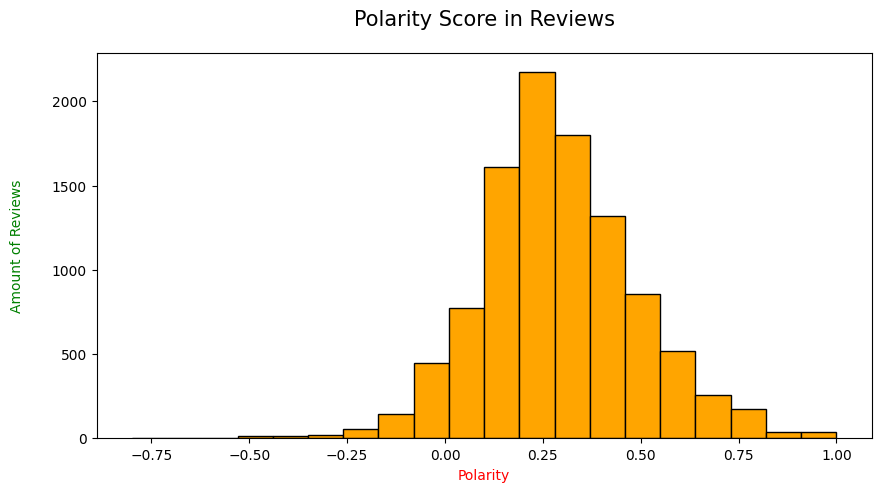

In [17]:
from textblob import TextBlob

df["Polarity"] = df["reviews"].map(lambda Text : TextBlob(Text).polarity)
df["Polarity"].plot(kind="hist", bins=20, edgecolor="black",linewidth=1, color="orange", figsize=(10,5))

plt.title("Polarity Score in Reviews", fontsize=15, pad=20)
plt.xlabel("Polarity", labelpad=5, color="red")
plt.ylabel("Amount of Reviews", labelpad=20, color="green")
plt.show()

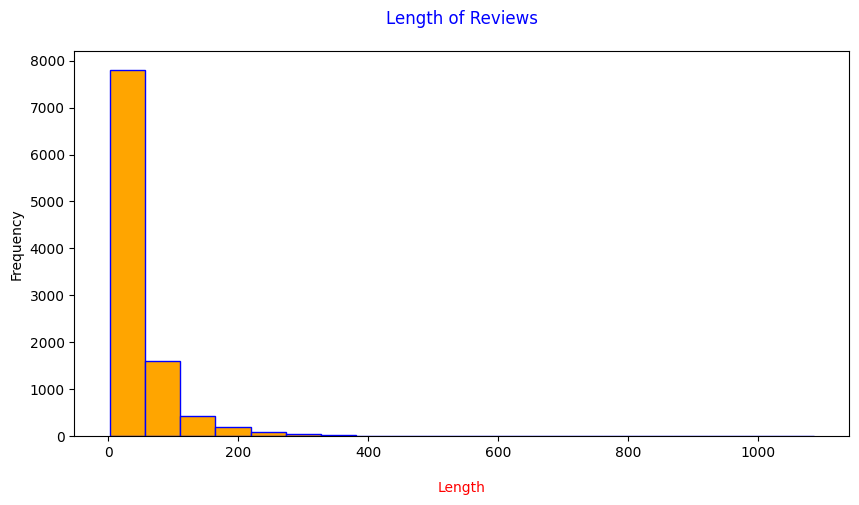

In [18]:
# Review length
df["length"] = df["reviews"].apply(lambda x: len(x.split()))

# Use plt.hist directly
plt.figure(figsize=(10,5))
plt.hist(df["length"], bins=20, edgecolor="blue", linewidth=1, color="orange")
plt.title("Length of Reviews", color="blue", pad=20)
plt.xlabel("Length", labelpad=15, color="red")
plt.ylabel("Frequency")
plt.show()

(array([9.406e+03, 6.410e+02, 1.500e+02, 3.900e+01, 1.000e+01, 7.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([   2. ,  110.4,  218.8,  327.2,  435.6,  544. ,  652.4,  760.8,
         869.2,  977.6, 1086. ]),
 <BarContainer object of 10 artists>)

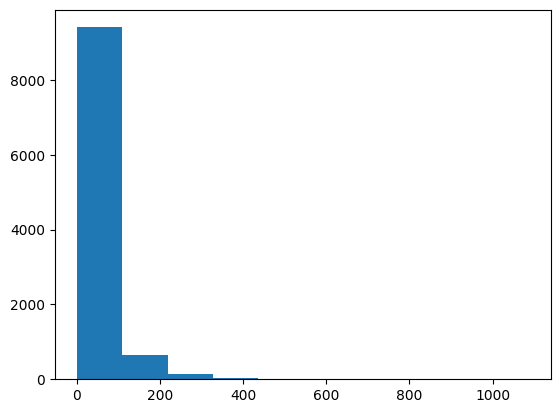

In [19]:
# Word Counts
df["Word_count"] = df["reviews"].apply(lambda x: len(x.split()))
plt.hist(df["Word_count"])

In [20]:
# N-Gram Analysis
def GramAnalysis(Corpus, Gram, N):
    Vectorizer = CountVectorizer(stop_words="english", ngram_range=(Gram,Gram))

    ngram_matrix = Vectorizer.fit_transform(Corpus)

    # N-Gram Frequency
    Counts = ngram_matrix.sum(axis=0)

    # List of words
    words = [(word, Counts[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

    # Sort Descending
    words = sorted(words, key=lambda x: x[1], reverse=True)

    return words[:N]


# Filter the platforms Based on Sentiments
Positive = df[df["sentiment"]=="Positive"].dropna()
Negative = df[df["sentiment"]=="Negative"].dropna()
Neutral  = df[df["sentiment"]=="Neutral"].dropna()

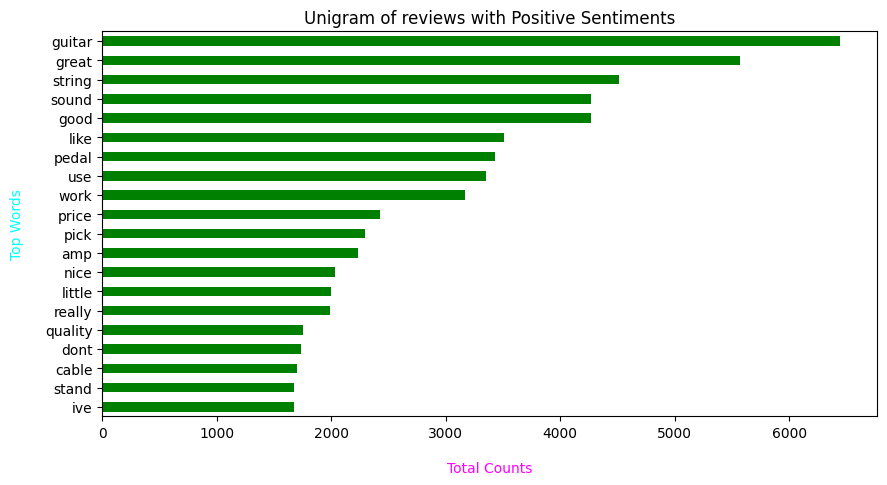

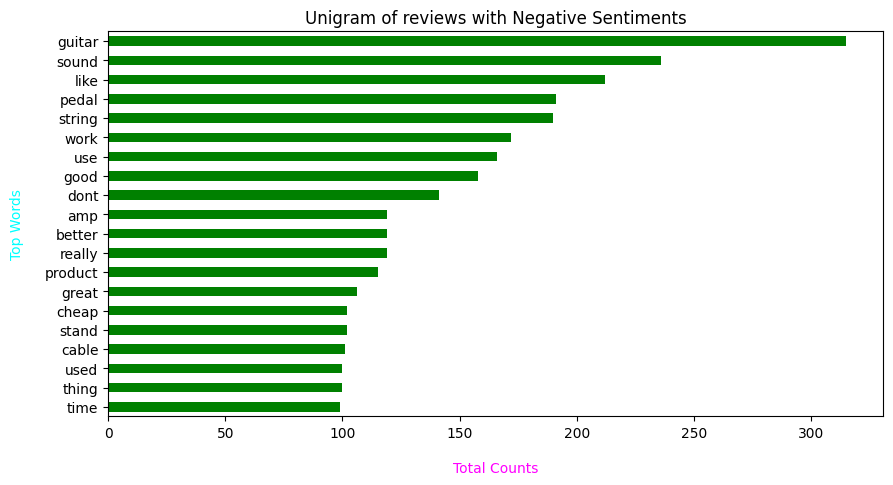

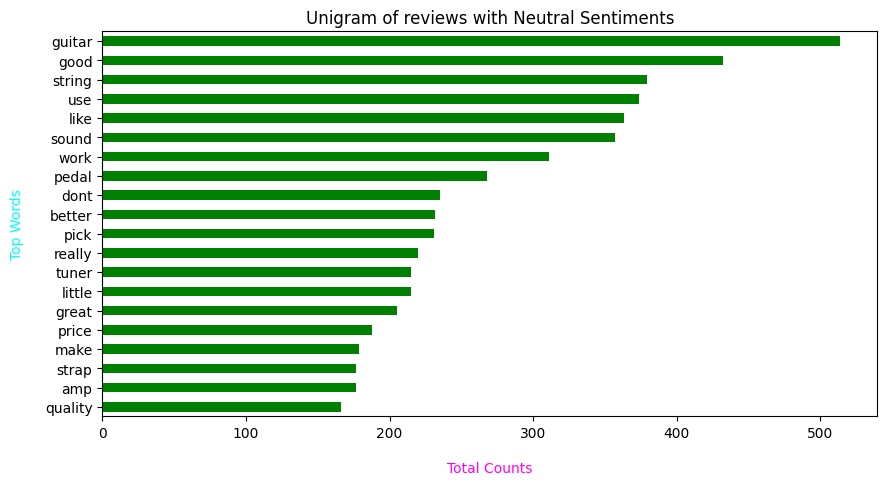

In [21]:
#Unigram  of reviews based on sentiments
#Positive
from sklearn.feature_extraction.text import CountVectorizer

words = GramAnalysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Unigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Unigram of reviews with Positive Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

# Negative
words = GramAnalysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Unigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Unigram of reviews with Negative Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

# Neutral

words = GramAnalysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Unigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Unigram of reviews with Neutral Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


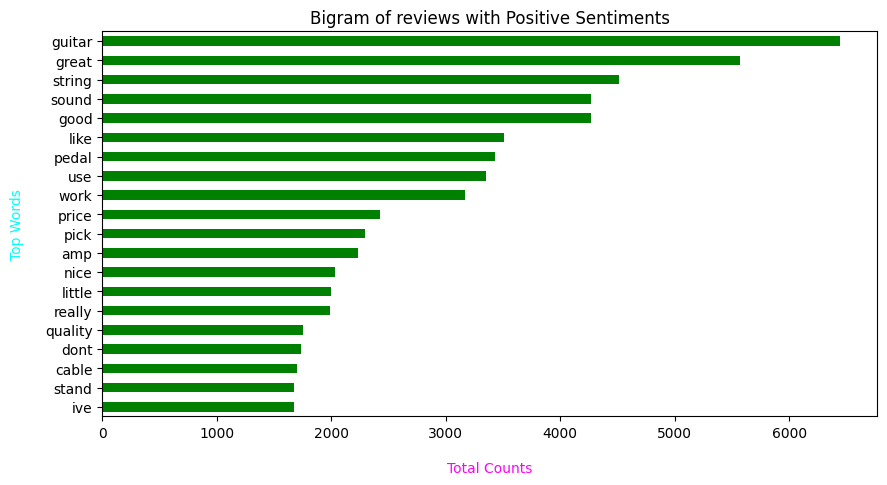

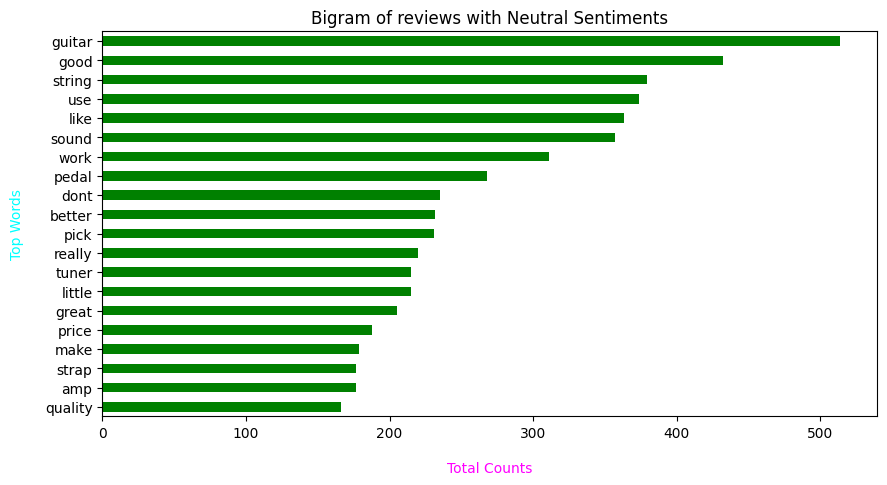

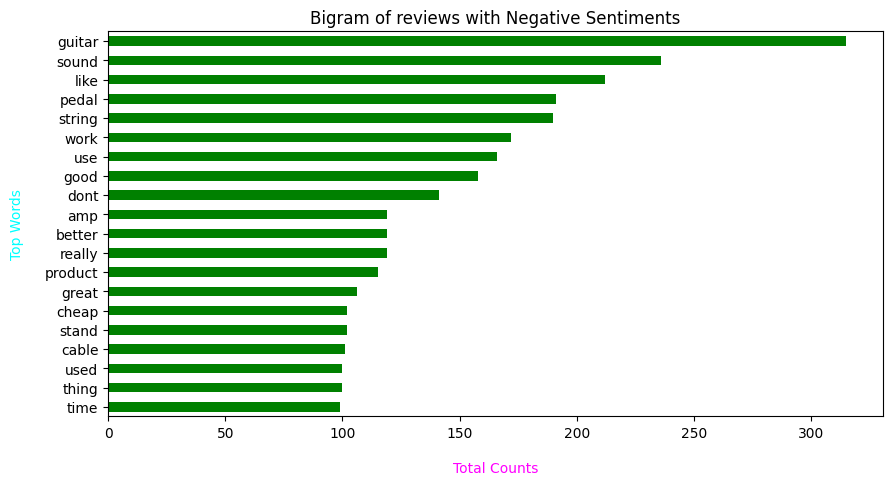

In [22]:
# Bigram - Positive, Negative, Neutral

#Positive

words = GramAnalysis(Positive["reviews"], 1, 20)
Bigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Bigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Bigram of reviews with Positive Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

#Neutral
words = GramAnalysis(Neutral["reviews"], 1, 20)
Bigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Bigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Bigram of reviews with Neutral Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

#Negative
words = GramAnalysis(Negative["reviews"], 1, 20)
Bigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Bigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Bigram of reviews with Negative Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

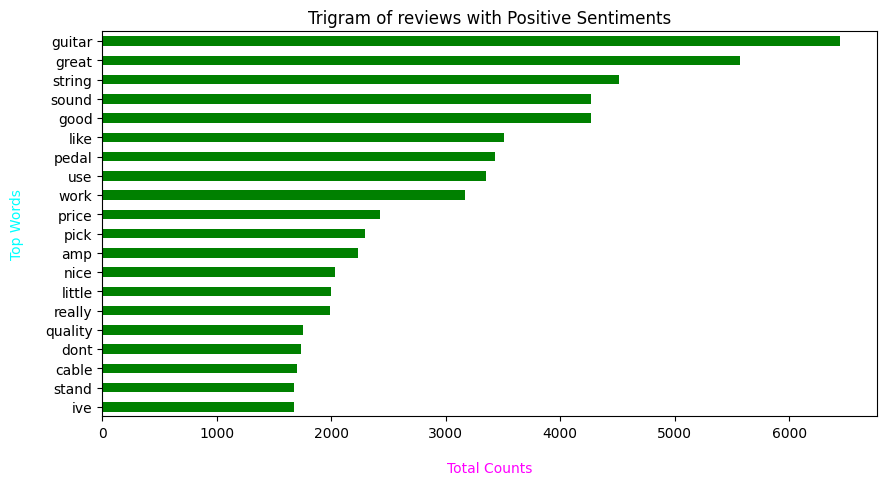

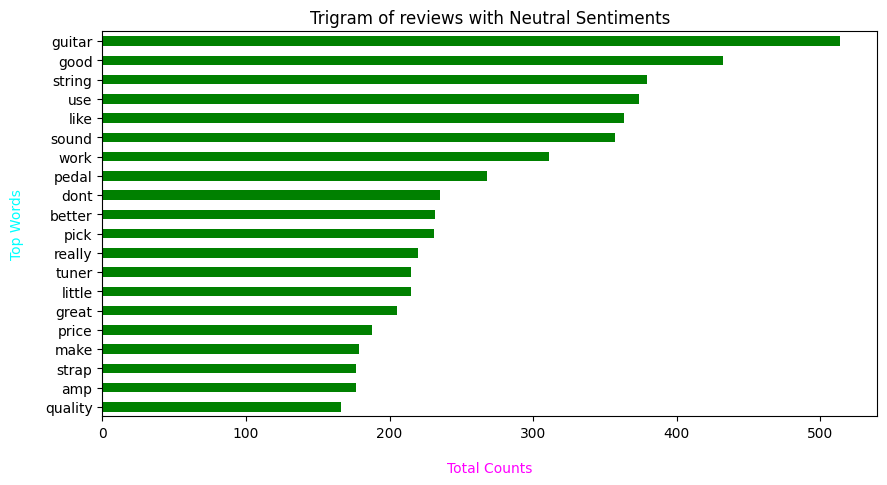

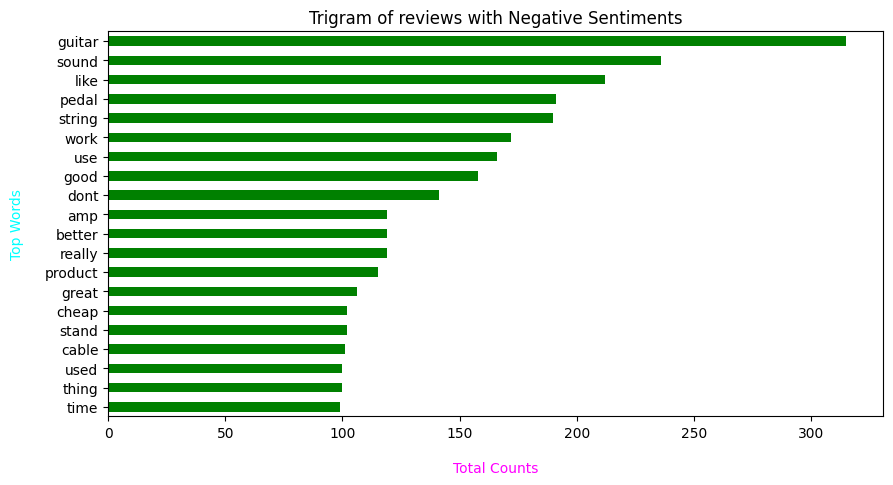

In [23]:
# trigram - Positive, Negative, Neutral

#Positive

words = GramAnalysis(Positive["reviews"], 1, 20)
Trigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Trigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Trigram of reviews with Positive Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

#Neutral
words = GramAnalysis(Neutral["reviews"], 1, 20)
Trigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Trigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Trigram of reviews with Neutral Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

#Negative
words = GramAnalysis(Negative["reviews"], 1, 20)
Trigram = pd.DataFrame(words, columns = ["words","counts"])

#Visualization
Trigram.groupby("words").sum()["counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10,5))
plt.title("Trigram of reviews with Negative Sentiments")
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

In [24]:
!pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


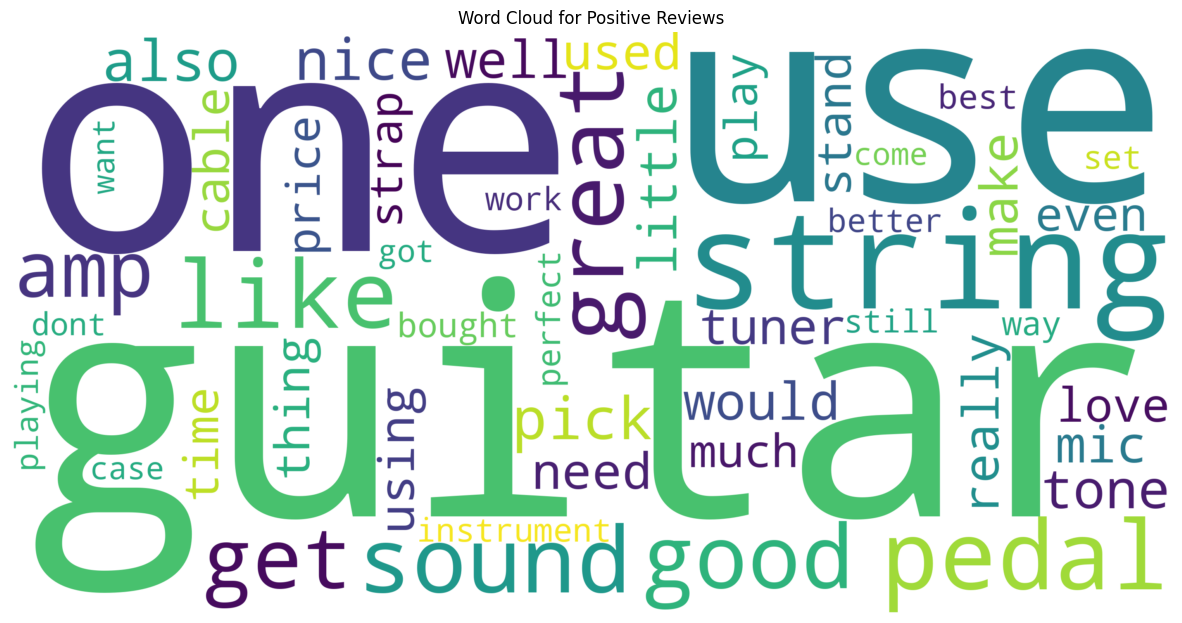

In [25]:
# Word Clouds
# Word cloud of Reviews with Positive Sentiments
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get English stopwords
stopwords_set = set(stopwords.words('english'))

# Extract positive reviews text (make sure to use the correct column name)
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['reviews'].astype(str))

# Create word cloud
wordcloud = WordCloud(max_words=50, width=3000,
                      height=1500, stopwords=stopwords_set,
                      background_color='white').generate(positive_reviews)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

In [26]:
# Feature Engineering
columns_to_keep = ['reviews', 'sentiment']  # Add other columns you've created
df = df[columns_to_keep]
df.head()

,reviews,sentiment
0,much write exactly supposed filter pop sound r...,Positive
1,product exactly quite affordablei realized dou...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


In [27]:
# Encoding Our Target Variables

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df['sentiment'].value_counts()

,count
sentiment,
2,9022
1,772
0,467


In [28]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = TF_IDF.fit_transform(df['reviews']).toarray()
X.shape

Y = df['sentiment']
Counter(Y)

Counter({2: 9022, 1: 772, 0: 467})

In [29]:
# Resampling our Dataset (to Balance)

from imblearn.over_sampling import SMOTE

Balancer = SMOTE(random_state=42)
X_final, y_final = Balancer.fit_resample(X, Y)
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

In [30]:
#Splitting dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final,y_final,test_size=0.25,random_state=42)

In [31]:
# Model Selection & Evaluation


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
LogReg = LogisticRegression()
RForest = RandomForestClassifier()

In [33]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [34]:
RForest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred_LogReg = LogReg.predict(X_test)
y_pred_RForest = RForest.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
accuracy_RForest = accuracy_score(y_test, y_pred_RForest)

In [37]:
print("Accuracy of Logistic Regression:", accuracy_LogReg)
print("Accuracy of Random Forest:", accuracy_RForest)

Accuracy of Logistic Regression: 0.9535983449091178
Accuracy of Random Forest: 0.9769469484261859


In [38]:
cm = confusion_matrix(y_test, y_pred_RForest)
cm

array([[2206,    1,   18],
       [   0, 2232,   45],
       [   9,   83, 2173]])

In [39]:
# Classification Scores
print(classification_report(y_test, y_pred_RForest))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2225
           1       0.96      0.98      0.97      2277
           2       0.97      0.96      0.97      2265

    accuracy                           0.98      6767
   macro avg       0.98      0.98      0.98      6767
weighted avg       0.98      0.98      0.98      6767



In [40]:
# --- Step 1: Create a function for text cleaning and preprocessing ---
def preprocess_new_text(text):
    # Clean text (use the same functions you defined earlier)
    text = Text_cleaning(text)
    text = Text_Preprocessing(text)
    return text

# --- Step 2: Function to predict sentiment for new text ---
def predict_sentiment(review, model, vectorizer, encoder):
    # Preprocess input review
    processed_review = preprocess_new_text(review)

    # Transform using the trained TF-IDF vectorizer
    vectorized_review = vectorizer.transform([processed_review]).toarray()

    # Predict sentiment
    pred = model.predict(vectorized_review)

    # Decode label back to sentiment
    sentiment_label = encoder.inverse_transform(pred)[0]
    return sentiment_label

# --- Step 3: Example usage ---
sample_review_1 = "This instrument has amazing sound quality and I love it!"
sample_review_2 = "The product is terrible, very disappointed."
sample_review_3 = "It is okay, not the best but not the worst either."

print("Review:", sample_review_1, "→ Sentiment:", predict_sentiment(sample_review_1, RForest, TF_IDF, encoder))
print("Review:", sample_review_2, "→ Sentiment:", predict_sentiment(sample_review_2, RForest, TF_IDF, encoder))
print("Review:", sample_review_3, "→ Sentiment:", predict_sentiment(sample_review_3, RForest, TF_IDF, encoder))


Review: This instrument has amazing sound quality and I love it! → Sentiment: Positive
Review: The product is terrible, very disappointed. → Sentiment: Positive
Review: It is okay, not the best but not the worst either. → Sentiment: Positive


In [45]:
# Save Flask app code to app.py
with open("app.py", "w") as f:
    f.write("""
from flask import Flask, render_template, request
import pickle, re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# --- Your text cleaning functions ---
def Text_cleaning(Text):
    Text = Text.lower()
    punc = str.maketrans('', '', string.punctuation)
    Text = Text.translate(punc)
    Text = re.sub(r'\\d+', '', Text)
    Text = re.sub(r'https?://\\S+|www\\.\\S+', '', Text)
    Text = re.sub('\\n', '', Text)
    return Text

def Text_Preprocessing(Text):
    tokens = word_tokenize(Text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

def preprocess_new_text(text):
    text = Text_cleaning(text)
    text = Text_Preprocessing(text)
    return text

# Load trained objects
model = pickle.load(open("model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf.pkl", "rb"))
encoder = pickle.load(open("encoder.pkl", "rb"))

app = Flask(__name__)

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    review = request.form["review"]
    processed = preprocess_new_text(review)
    vectorized = vectorizer.transform([processed]).toarray()
    prediction = model.predict(vectorized)
    sentiment_label = encoder.inverse_transform(prediction)[0]
    return render_template("index.html", review=review, prediction=sentiment_label)

if __name__ == "__main__":
    app.run()
""")


In [43]:
import pickle

# Save the trained Random Forest model
with open("model.pkl", "wb") as f:
    pickle.dump(RForest, f)

# Save the TF-IDF vectorizer
with open("tfidf.pkl", "wb") as f:
    pickle.dump(TF_IDF, f)

# Save the label encoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("Model, vectorizer, and encoder saved successfully!")

Model, vectorizer, and encoder saved successfully!


In [46]:
import os

os.makedirs("templates", exist_ok=True)

with open("templates/index.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html>
<head>
    <title>Amazon Instrument Review Sentiment</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 50px; background-color: #f7f7f7; }
        .container { background: white; padding: 20px; border-radius: 10px; width: 500px; margin: auto; }
        textarea { width: 100%; height: 100px; padding: 10px; }
        button { background: #007BFF; color: white; padding: 10px 20px; border: none; border-radius: 5px; }
        .result { margin-top: 20px; font-size: 18px; }
    </style>
</head>
<body>
    <div class="container">
        <h2>Amazon Instrument Review Sentiment</h2>
        <form method="POST" action="/predict">
            <textarea name="review" placeholder="Enter your review here"></textarea><br><br>
            <button type="submit">Predict Sentiment</button>
        </form>

        {% if prediction %}
            <div class="result">
                <b>Review:</b> {{ review }} <br>
                <b>Predicted Sentiment:</b> {{ prediction }}
            </div>
        {% endif %}
    </div>
</body>
</html>
""")


In [51]:
from pyngrok import ngrok
import subprocess

# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
# You can get this from your ngrok dashboard: https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("33EVeA5ugDFDiyxWapRm7Pv8Y3T_XwVp9AuCkdWfMwZkh5BX")

# Kill old tunnels if any
ngrok.kill()

# Start Flask app in background
process = subprocess.Popen(["python", "app.py"])

# Create ngrok tunnel
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://nondilatable-evanescently-jeri.ngrok-free.dev" -> "http://localhost:5000"


In [48]:
!pip install pyngrok flask